# Import Library & Data

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
import os 
os.chdir(r"C:\Users\akash\Downloads\DATA SCIENCE PROJECTS\IPL\Final\Dataset") 

In [3]:
# importing or loading the dataset 
Data_for_PCA = pd.read_csv(r"BATSMAN.csv")

Data_for_PCA.head()

,Name,Role,Runs,Highest,Average,Batting_strike_rate,Fifties,Fours,Sixes
0,Ruturaj Gaikwad,BATSMAN,204,72,51.00,120.71,3,16,6
1,KL Rahul,BATSMAN,2647,132,44.86,135.81,21,234,104
2,David Warner,BATSMAN,5254,126,42.72,141.54,48,511,194
3,Jonny Bairstow,BATSMAN,790,114,41.58,142.34,5,79,31
4,Chris Gayle,BATSMAN,4772,175,41.14,150.11,31,384,349


# Data Pre-Processing

### Checking missing values

In [4]:
Data_for_PCA.isna().sum()

Name                   0
Role                   0
Runs                   0
Highest                0
Average                0
Batting_strike_rate    0
Fifties                0
Fours                  0
Sixes                  0
dtype: int64

<AxesSubplot:xlabel='Runs', ylabel='Batting_strike_rate'>

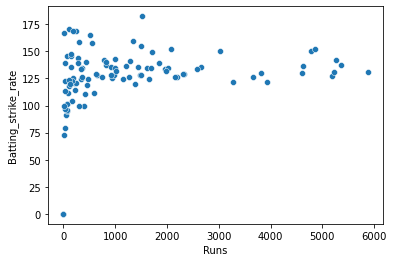

In [5]:
sns.scatterplot(data=Data_for_PCA, x= "Runs", y="Batting_strike_rate")

- There is no missing value in the data

In [6]:
?seaborn

Object `seaborn` not found.


# Exploratory Data Analysis

<AxesSubplot:xlabel='Runs', ylabel='Count'>

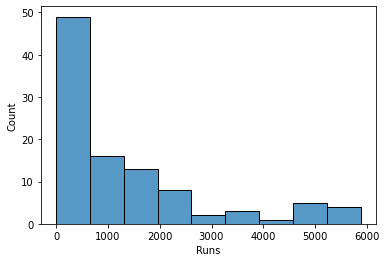

In [7]:
sns.histplot(data = Data_for_PCA, x = "Runs")

<AxesSubplot:xlabel='Highest', ylabel='Count'>

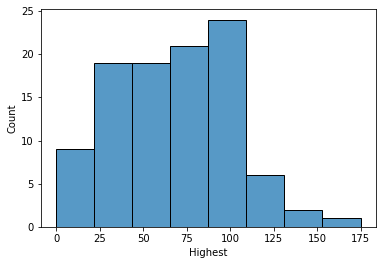

In [8]:
sns.histplot(data = Data_for_PCA, x = "Highest")

<AxesSubplot:xlabel='Average', ylabel='Count'>

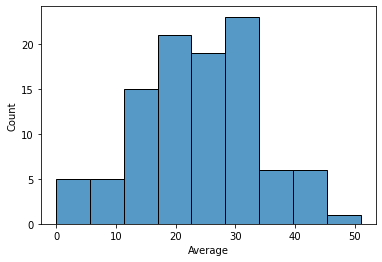

In [9]:
sns.histplot(data = Data_for_PCA, x = "Average")

<AxesSubplot:xlabel='Batting_strike_rate', ylabel='Count'>

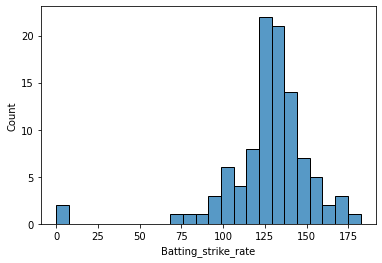

In [10]:
sns.histplot(data = Data_for_PCA, x = "Batting_strike_rate")

<AxesSubplot:xlabel='Fifties', ylabel='Count'>

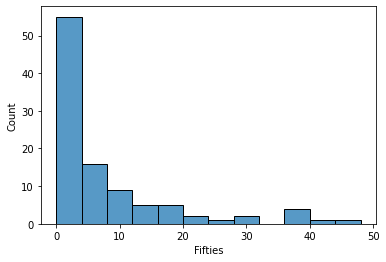

In [11]:
sns.histplot(data = Data_for_PCA, x = "Fifties")

<AxesSubplot:xlabel='Fours', ylabel='Count'>

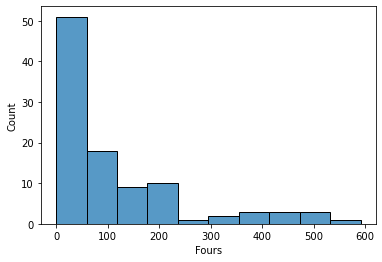

In [12]:
sns.histplot(data = Data_for_PCA, x = "Fours")

<AxesSubplot:xlabel='Sixes', ylabel='Count'>

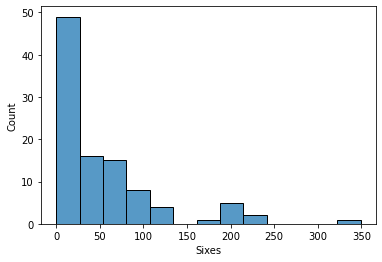

In [13]:
sns.histplot(data = Data_for_PCA, x = "Sixes")

In [14]:
Data_for_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 101 non-null    object 
 1   Role                 101 non-null    object 
 2   Runs                 101 non-null    int64  
 3   Highest              101 non-null    int64  
 4   Average              101 non-null    float64
 5   Batting_strike_rate  101 non-null    float64
 6   Fifties              101 non-null    int64  
 7   Fours                101 non-null    int64  
 8   Sixes                101 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 7.2+ KB


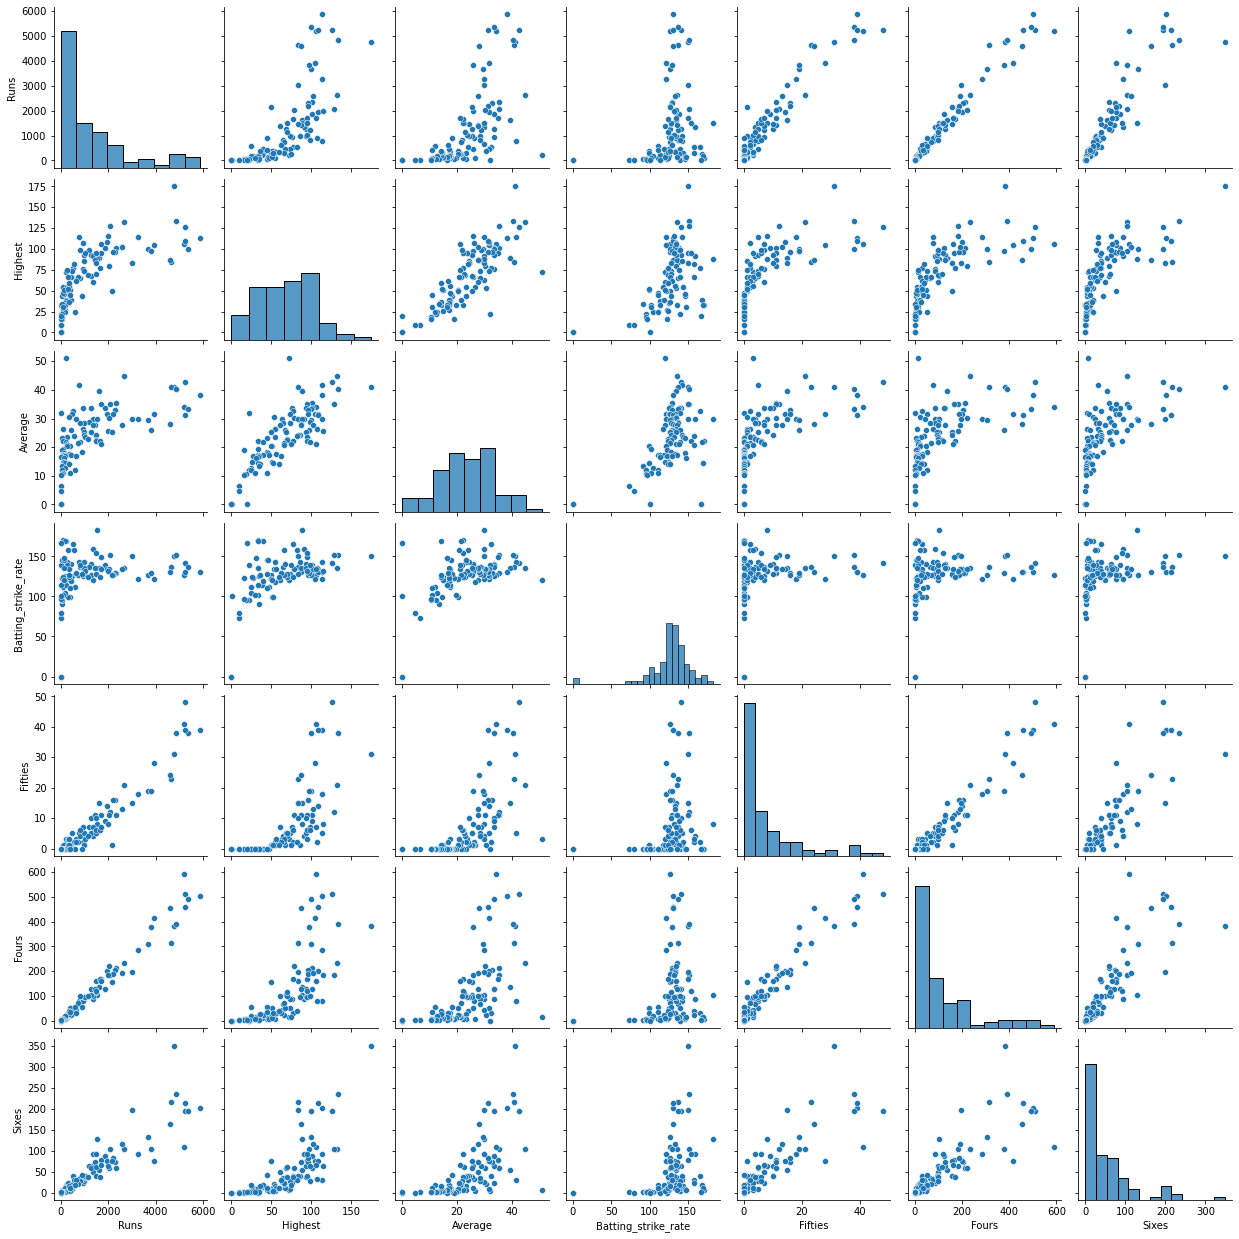

In [15]:
sns.pairplot(data=Data_for_PCA)

In [16]:
Data_for_PCA.describe() 

,Runs,Highest,Average,Batting_strike_rate,Fifties,Fours,Sixes
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1288.247525,67.445545,23.865545,127.649307,7.346535,113.158416,51.178218
std,1511.570471,35.137580,10.176719,26.380231,10.838298,138.507598,64.129774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.000000,38.000000,17.120000,121.390000,0.000000,13.000000,6.000000
50%,746.000000,68.000000,23.960000,129.400000,3.000000,54.000000,27.000000
75%,1714.000000,95.000000,30.500000,139.130000,10.000000,162.000000,73.000000
max,5878.000000,175.000000,51.000000,182.330000,48.000000,591.000000,349.000000


## Taking specific column for Analysis

In [17]:
numeric_predictors=['Runs','Highest','Average','Batting_strike_rate','Fifties','Fours', 'Sixes']
X_train = Data_for_PCA[numeric_predictors]
y_train = Data_for_PCA['Name']

In [18]:
X_train.head()

,Runs,Highest,Average,Batting_strike_rate,Fifties,Fours,Sixes
0,204,72,51.00,120.71,3,16,6
1,2647,132,44.86,135.81,21,234,104
2,5254,126,42.72,141.54,48,511,194
3,790,114,41.58,142.34,5,79,31
4,4772,175,41.14,150.11,31,384,349


In [19]:
Correlation=X_train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Runs,Highest,Average,Batting_strike_rate,Fifties,Fours,Sixes
Runs,1.000000,0.741641,0.626783,0.233730,0.957840,0.983915,0.910438
Highest,0.741641,1.000000,0.811442,0.490456,0.711638,0.727976,0.742623
Average,0.626783,0.811442,1.000000,0.520944,0.627856,0.601626,0.616025
Batting_strike_rate,0.233730,0.490456,0.520944,1.000000,0.202380,0.204587,0.318653
Fifties,0.957840,0.711638,0.627856,0.202380,1.000000,0.962515,0.858832
Fours,0.983915,0.727976,0.601626,0.204587,0.962515,1.000000,0.844299
Sixes,0.910438,0.742623,0.616025,0.318653,0.858832,0.844299,1.000000


<AxesSubplot:>

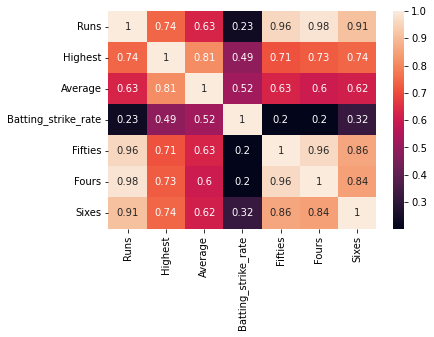

In [20]:
sns.heatmap(X_train.corr(), annot=True)

### PCA is effected by scale so you need to scale the features in the data before applying PCA. 

* You can transform the data onto unit scale (mean = 0 and variance = 1)

In [21]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() # mean 0 & std=1
  
X_train_1 = sc.fit_transform(X_train)  # Fit to data, then transform it.

### Mean

In [22]:
X_train_1.mean(axis=0)

array([-2.19846143e-18, -2.35235374e-16,  2.19846143e-16, -1.01129226e-16,
        2.19846143e-17,  1.31907686e-17,  1.97861529e-17])

### Standard Deviation

In [23]:
X_train_1.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [24]:
X_train.head(3)

,Runs,Highest,Average,Batting_strike_rate,Fifties,Fours,Sixes
0,204,72,51.00,120.71,3,16,6
1,2647,132,44.86,135.81,21,234,104
2,5254,126,42.72,141.54,48,511,194


In [25]:
X_train_1

array([[-7.20876266e-01,  1.30264267e-01,  2.67962497e+00,
        -2.64361488e-01, -4.03034968e-01, -7.04964933e-01,
        -7.07994807e-01],
       [ 9.03384502e-01,  1.84635440e+00,  2.07327791e+00,
         3.10891705e-01,  1.26602556e+00,  8.76805973e-01,
         8.27778280e-01],
       [ 2.63668283e+00,  1.67474539e+00,  1.86194522e+00,
         5.29183149e-01,  3.76961636e+00,  2.88667084e+00,
         2.23818214e+00],
       [-3.31266438e-01,  1.33152736e+00,  1.74936612e+00,
         5.59660139e-01, -2.17583798e-01, -2.47847653e-01,
        -3.16215958e-01],
       [ 2.31621878e+00,  3.07621899e+00,  1.70591454e+00,
         8.55667909e-01,  2.19328141e+00,  1.96518045e+00,
         4.66721100e+00],
       [ 2.22313793e+00,  4.73482294e-01,  1.69110150e+00,
         3.47083131e-01,  1.45147673e+00,  1.45001653e+00,
         2.58294752e+00],
       [ 2.36741324e+00,  1.87495590e+00,  1.63382442e+00,
         9.24241137e-01,  2.84236051e+00,  2.00871543e+00,
         2.8806994

# No. of variable in original dataset

In [26]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
model = PCA(n_components = 2) # we are specifying we want 2 PCA
  
principalComponents= model.fit(X_train_1) # Fit the model with X and apply the dimensionality reduction on X.

# Explained Variance
* The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

* This is important as while you can convert high dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, 

In [27]:
import numpy as np
list(np.round(principalComponents.explained_variance_,3))   # eigen values  >= 1 

[5.133, 1.147]

In [28]:
5.13/7

0.7328571428571429

In [29]:
1.15/7

0.16428571428571428

In [30]:
list(np.round(principalComponents.explained_variance_ratio_,2))    # >= 50%

[0.73, 0.16]

* You can see that the first principal component contains 73% of the variance 
* You can see that the second principal component contains 16% of the variance 

In [31]:
0.73+0.16

0.89

In [32]:
principalComponents.mean_

array([-2.19846143e-18, -2.35235374e-16,  2.19846143e-16, -1.01129226e-16,
        2.19846143e-17,  1.31907686e-17,  1.97861529e-17])

In [33]:
principalComponents.get_covariance()

array([[1.10738529, 0.76513713, 0.65651227, 0.21422241, 0.9338797 ,
        0.93683606, 0.88468117],
       [0.76513713, 0.96928885, 0.76949206, 0.54819609, 0.74293395,
        0.74214924, 0.75953526],
       [0.65651227, 0.76949206, 0.90880313, 0.61187394, 0.63381211,
        0.63194542, 0.66925117],
       [0.21422241, 0.54819609, 0.61187394, 0.93074899, 0.1920356 ,
        0.18659303, 0.2894419 ],
       [0.9338797 , 0.74293395, 0.63381211, 0.1920356 , 1.07705457,
        0.92214785, 0.86789051],
       [0.93683606, 0.74214924, 0.63194542, 0.18659303, 0.92214785,
        1.0832464 , 0.86988775],
       [0.88468117, 0.75953526, 0.66925117, 0.2894419 , 0.86789051,
        0.86988775, 0.99347277]])

In [34]:
X_train_1 ### scaled dataset

array([[-7.20876266e-01,  1.30264267e-01,  2.67962497e+00,
        -2.64361488e-01, -4.03034968e-01, -7.04964933e-01,
        -7.07994807e-01],
       [ 9.03384502e-01,  1.84635440e+00,  2.07327791e+00,
         3.10891705e-01,  1.26602556e+00,  8.76805973e-01,
         8.27778280e-01],
       [ 2.63668283e+00,  1.67474539e+00,  1.86194522e+00,
         5.29183149e-01,  3.76961636e+00,  2.88667084e+00,
         2.23818214e+00],
       [-3.31266438e-01,  1.33152736e+00,  1.74936612e+00,
         5.59660139e-01, -2.17583798e-01, -2.47847653e-01,
        -3.16215958e-01],
       [ 2.31621878e+00,  3.07621899e+00,  1.70591454e+00,
         8.55667909e-01,  2.19328141e+00,  1.96518045e+00,
         4.66721100e+00],
       [ 2.22313793e+00,  4.73482294e-01,  1.69110150e+00,
         3.47083131e-01,  1.45147673e+00,  1.45001653e+00,
         2.58294752e+00],
       [ 2.36741324e+00,  1.87495590e+00,  1.63382442e+00,
         9.24241137e-01,  2.84236051e+00,  2.00871543e+00,
         2.8806994

# Beta Values or Eigen Vector 
Z1 = Beta1*x1+Beta2*X2 + beta3*X3 + ..... + beta13*X13

In [35]:
principalComponents.components_   ##  BETA VALUES  Z1 , Z2 

array([[ 0.4235031 ,  0.38979933,  0.35273304,  0.18910616,  0.41416174,
         0.41469154,  0.40622759],
       [ 0.24021874, -0.23657986, -0.36507751, -0.77560058,  0.25768755,
         0.26543378,  0.12095085]])

### Renaming the Columns  

* Prediction for data to get data reduction 

In [36]:
X_train_1  # scaled data

array([[-7.20876266e-01,  1.30264267e-01,  2.67962497e+00,
        -2.64361488e-01, -4.03034968e-01, -7.04964933e-01,
        -7.07994807e-01],
       [ 9.03384502e-01,  1.84635440e+00,  2.07327791e+00,
         3.10891705e-01,  1.26602556e+00,  8.76805973e-01,
         8.27778280e-01],
       [ 2.63668283e+00,  1.67474539e+00,  1.86194522e+00,
         5.29183149e-01,  3.76961636e+00,  2.88667084e+00,
         2.23818214e+00],
       [-3.31266438e-01,  1.33152736e+00,  1.74936612e+00,
         5.59660139e-01, -2.17583798e-01, -2.47847653e-01,
        -3.16215958e-01],
       [ 2.31621878e+00,  3.07621899e+00,  1.70591454e+00,
         8.55667909e-01,  2.19328141e+00,  1.96518045e+00,
         4.66721100e+00],
       [ 2.22313793e+00,  4.73482294e-01,  1.69110150e+00,
         3.47083131e-01,  1.45147673e+00,  1.45001653e+00,
         2.58294752e+00],
       [ 2.36741324e+00,  1.87495590e+00,  1.63382442e+00,
         9.24241137e-01,  2.84236051e+00,  2.00871543e+00,
         2.8806994

In [37]:
transformed_data=principalComponents.fit_transform(X_train_1)  ### only give data which is transformed ( principal component)
transformed_data

array([[-0.1061882 , -1.35382895],
       [ 3.11660874, -0.55874186],
       [ 6.19381954,  1.15529372],
       [ 0.78027967, -1.62741828],
       [ 6.56284523,  0.19348987],
       [ 4.03993207,  0.60676257],
       [ 5.66496079,  0.42585061],
       [ 1.30982137, -0.63539889],
       [ 5.6631468 ,  1.60888434],
       [ 1.56098426, -0.23093943],
       [ 2.18794926, -1.06821892],
       [ 1.43878102, -0.92662585],
       [ 4.97568393,  1.84681614],
       [ 0.94000334, -0.79810921],
       [ 1.2831167 , -0.68646957],
       [ 0.05135038, -0.50025731],
       [ 5.1391996 ,  1.54489146],
       [ 1.67726578,  0.02105299],
       [-0.06174186, -1.92322651],
       [-1.42364954, -1.01041933],
       [ 3.25429139,  1.19386103],
       [ 1.63069927, -0.24498343],
       [-0.46204222, -0.62431477],
       [ 1.59029653,  0.13949952],
       [ 5.13760872,  1.7190414 ],
       [-0.85032354, -0.87538774],
       [ 1.11506593, -0.08597483],
       [ 0.77650655, -1.357431  ],
       [ 2.51113274,

In [38]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (101, 7)
transformed shape: (101, 2)


In [39]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['Data PC1', 'Data PC2'])
principalDf.head()

,Data PC1,Data PC2
0,-0.106188,-1.353829
1,3.116609,-0.558742
2,6.193820,1.155294
3,0.780280,-1.627418
4,6.562845,0.193490


# To check the Principal Component is uncorrelated / independent

In [40]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Data PC1,Data PC2
Data PC1,1.000000,0.000000
Data PC2,0.000000,1.000000


## Identify variable is combining together in Which PCA 

In [41]:
numeric_predictors_1=['Runs','Highest','Average','Batting_strike_rate','Fifties','Fours', 'Sixes']
scaled_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
scaled_train.head()

,Runs,Highest,Average,Batting_strike_rate,Fifties,Fours,Sixes
0,-0.720876,0.130264,2.679625,-0.264361,-0.403035,-0.704965,-0.707995
1,0.903385,1.846354,2.073278,0.310892,1.266026,0.876806,0.827778
2,2.636683,1.674745,1.861945,0.529183,3.769616,2.886671,2.238182
3,-0.331266,1.331527,1.749366,0.559660,-0.217584,-0.247848,-0.316216
4,2.316219,3.076219,1.705915,0.855668,2.193281,1.965180,4.667211


In [42]:
final_data=pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Runs,Highest,Average,Batting_strike_rate,Fifties,Fours,Sixes,Data PC1,Data PC2
0,-0.720876,0.130264,2.679625,-0.264361,-0.403035,-0.704965,-0.707995,-0.106188,-1.353829
1,0.903385,1.846354,2.073278,0.310892,1.266026,0.876806,0.827778,3.116609,-0.558742
2,2.636683,1.674745,1.861945,0.529183,3.769616,2.886671,2.238182,6.193820,1.155294
3,-0.331266,1.331527,1.749366,0.559660,-0.217584,-0.247848,-0.316216,0.780280,-1.627418
4,2.316219,3.076219,1.705915,0.855668,2.193281,1.965180,4.667211,6.562845,0.193490


In [43]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=abs(Correlation_Matrix.iloc[0:7,7:9])
Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 50 else '')

,Data PC1,Data PC2
Runs,95.500000,25.600000
Highest,87.900000,25.200000
Average,79.500000,38.900000
Batting_strike_rate,42.600000,82.600000
Fifties,93.400000,27.500000
Fours,93.500000,28.300000
Sixes,91.600000,12.900000


* Data PC1 = Runs,Highest,Average,Fifties,Fours, Sixes
* Data PC2 = Batting_strike_rate

In [44]:
a=final_data["Data PC1"]

In [45]:
b=final_data["Data PC2"]

In [46]:
c=a+b

In [47]:
c.head()

0   -1.460017
1    2.557867
2    7.349113
3   -0.847139
4    6.756335
dtype: float64

In [48]:
d=pd.DataFrame(y_train)


In [49]:
Batter_ranking_final=pd.concat([c,d],axis=1)

In [50]:
Batter_ranking_final.head()

,0,Name
0,-1.460017,Ruturaj Gaikwad
1,2.557867,KL Rahul
2,7.349113,David Warner
3,-0.847139,Jonny Bairstow
4,6.756335,Chris Gayle


In [51]:
Batter_ranking_final1= Batter_ranking_final.sort_values([0],ascending=False,ignore_index= True)

In [52]:
Batter_ranking_final1.head()

,0,Name
0,7.349113,David Warner
1,7.272031,Virat Kohli
2,6.856650,Rohit Sharma
3,6.822500,Shikhar Dhawan
4,6.756335,Chris Gayle


In [54]:
Batter_ranking_final1.to_csv("ranking_batsman_ipl.csv",index=False)